## Pymaceuticals Analysis

In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Resources/mouse_metadata.csv"
study_results_path = "Resources/study_results.csv"

# Read the mouse data and the study results
mouse_df = pd.read_csv(mouse_metadata_path)
results_df = pd.read_csv(study_results_path)

In [38]:
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [39]:
results_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [40]:
# Combine the data into a single dataset

combined_df = pd.merge(mouse_df, results_df, on="Mouse ID", how="left")

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [41]:
# Checking the number of mice.

print(combined_df['Mouse ID'].nunique())

249


In [45]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

mouse_df["Mouse ID"].value_counts() 
results_df["Mouse ID"].value_counts() 

dupdrug = mouse_df.loc[mouse_df["Mouse ID"] == "g989", :]
dupdrug 

dupmouse = results_df.loc[results_df["Mouse ID"] == "g989", :]
dupmouse

clean_mouse_df = mouse_df.loc[mouse_df["Mouse ID"] != "g989", :]
clean_results_df = results_df.loc[results_df["Mouse ID"] != "g989", :]

clean_df = pd.merge(clean_mouse_df, clean_results_df, on="Mouse ID", how="outer")
clean_df.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [43]:
# Checking the number of mice in the clean DataFrame.
print(clean_df['Mouse ID'].nunique())

248


## Summary Statistics

In [47]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdev = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": stdev, 
                          "SEM": sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

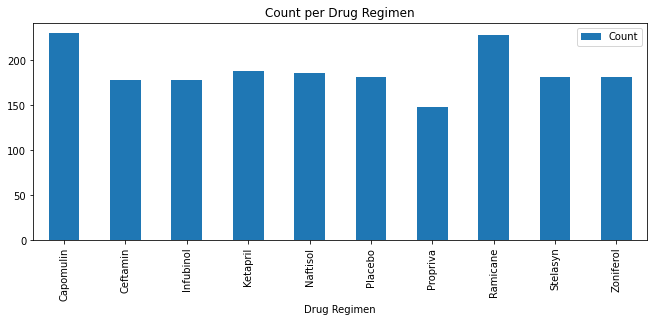

<Figure size 432x288 with 0 Axes>

In [124]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

mice_per_regimen_df = pd.DataFrame(clean_df.groupby(["Drug Regimen"]).count()).reset_index()

# set up chart values
regimen_values = mice_per_regimen_df[["Drug Regimen","Mouse ID"]]
regimen_values = regimen_values.rename(columns={"Mouse ID": "Count"})

# set index to Drug Regimen so labels are on x axis
regimen_values = regimen_values.set_index("Drug Regimen")

# set up bar graph

regimen_values.plot(kind="bar", figsize=(11,4))

plt.title("Count per Drug Regimen")

plt.show()
plt.tight_layout()

<BarContainer object of 10 artists>

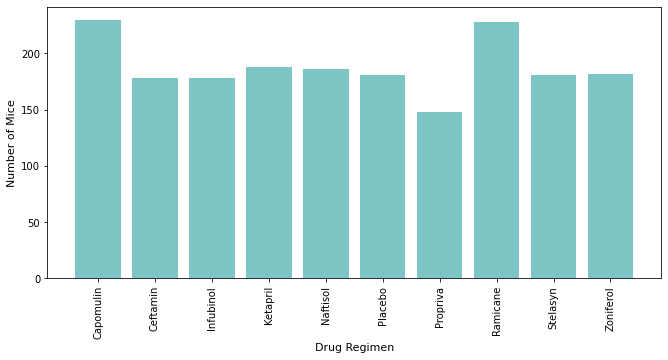

In [157]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

# assign all variables needed

regimen_names = summary_df.index.tolist()
regimen_names

regimen_amount = (clean_df.groupby(["Drug Regimen"])["Age_months"].count()).tolist()
regimen_amount

x_axis = np.arange(len(regimen_amount))

x_axis = regimen_names

# set up chart

plt.figure(figsize=(11,5))
plt.xlabel("Drug Regimen",fontsize = 11)
plt.ylabel("Number of Mice",fontsize = 11)
plt.xticks(rotation=90)
plt.bar(x_axis, regimen_amount, color='darkcyan', alpha=0.5, align="center")

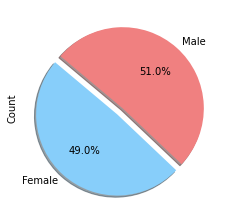

In [161]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# clean up sex information by creating data frame & narrowing down to two columns (sex & count)
sex_df = pd.DataFrame(clean_df.groupby(["Sex"]).count()).reset_index()

sex_df = sex_df[["Sex","Mouse ID"]]
sex_df = sex_df.rename(columns={"Mouse ID": "Count"})

# set up pie chart

plt.figure(figsize=(8,5))

axpie = plt.subplot(121, aspect='equal')

colors = ["lightskyblue", "lightcoral"]
explode = (0.1, 0)

sex_df.plot(kind='pie', y = "Count", ax=axpie, autopct='%1.1f%%', 
 startangle=140, shadow=True, labels=sex_df['Sex'], legend = False, colors = colors, explode = explode, fontsize=10)

([<matplotlib.patches.Wedge at 0x1f01ebaddf0>,
 [Text(-0.79864235783093, -0.8956396509078041, 'Female'),
  Text(0.7320888280116862, 0.8210030133321533, 'Male')],
 [Text(-0.46587470873470915, -0.5224564630295523, '49.0%'),
  Text(0.39932117891546515, 0.4478198254539018, '51.0%')])

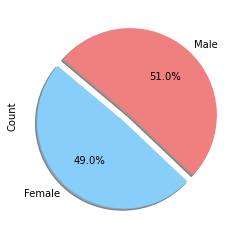

In [112]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex_percent = (clean_df.groupby(["Sex"])["Age_months"].count()).tolist()

labels = ["Female", "Male"]

colors = ["lightskyblue", "lightcoral"]

explode = (0.1,0)

plt.ylabel('Count', fontsize = 10)

plt.pie(sex_percent, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)


## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

capo_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
rami_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
infu_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
ceft_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]

In [67]:
# Start by getting the last (greatest) timepoint for each mouse
capo_last = capo_df.groupby('Mouse ID').max()['Timepoint']
capo_last_volume = pd.DataFrame(capo_last)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
capo_combined = pd.merge(capo_last_volume, clean_df, on=("Mouse ID","Timepoint"),how="left")
capo_combined.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [77]:
# determine outliers for Capomulin

tumors_capo = capo_combined["Tumor Volume (mm3)"]

quartiles_capo = tumors_capo.quantile([.25,.5,.75])
lowerq_capo = quartiles[0.25]
upperq_capo = quartiles[0.75]
iqr_capo = upperq-lowerq

lower_bound_capo = lowerq_capo - (1.5*iqr_capo)
upper_bound_capo = upperq_capo + (1.5*iqr_capo)
print(f"Potential outliers within the Capomulin dataset are likely values below {lower_bound_capo}, and values above {upper_bound_capo} could be outliers.")
    

Potential outliers within the Capomulin data set are likely values below 20.70456164999999, and values above 51.83201549 could be outliers.


In [71]:
rami_last = rami_df.groupby('Mouse ID').max()['Timepoint']
rami_last_volume = pd.DataFrame(rami_last)
rami_combined = pd.merge(rami_last_volume, clean_df, on=("Mouse ID","Timepoint"),how="left")
rami_combined.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [79]:
# determine outliers for Ramicane

tumors_rami = rami_combined["Tumor Volume (mm3)"]

quartiles_rami = tumors_rami.quantile([.25,.5,.75])
lowerq_rami = quartiles_rami[0.25]
upperq_rami = quartiles_rami[0.75]
iqr_rami = upperq_rami-lowerq_rami

lower_bound_rami = lowerq_rami - (1.5*iqr_rami)
upper_bound_rami = upperq_rami + (1.5*iqr_rami)
print(f"Potential outliers within the Ramicane dataset are likely values below {lower_bound_rami} and values above {upper_bound_rami} could be outliers.")

Potential outliers within the Ramicane data set are likely values below 17.912664470000003 and above 54.30681135 could be outliers.


In [80]:
# set variables for Infubinol

infu_last = infu_df.groupby('Mouse ID').max()['Timepoint']
infu_last_volume = pd.DataFrame(infu_last)
infu_combined = pd.merge(infu_last_volume, clean_df, on=("Mouse ID","Timepoint"),how="left")
infu_combined.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [81]:
# determine outliers for Infubinol

tumors_infu = infu_combined["Tumor Volume (mm3)"]

quartiles_infu = tumors_infu.quantile([.25,.5,.75])
lowerq_infu = quartiles_infu[0.25]
upperq_infu = quartiles_infu[0.75]
iqr_infu = upperq_infu-lowerq_infu

lower_bound_infu = lowerq_infu - (1.5*iqr_infu)
upper_bound_infu = upperq_infu + (1.5*iqr_infu)
print(f"Potential outliers within the Infubinol dataset are likely values below {lower_bound_infu} and values above {upper_bound_infu} could be outliers.")

Potential outliers within the Infubinol dataset are likely values below 36.83290494999999 and values above 82.74144559000001 could be outliers.


In [82]:
# set variables for Ceftamin

ceft_last = ceft_df.groupby('Mouse ID').max()['Timepoint']
ceft_last_volume = pd.DataFrame(ceft_last)
ceft_combined = pd.merge(ceft_last_volume, clean_df, on=("Mouse ID","Timepoint"),how="left")
ceft_combined.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [83]:
# determine outliers for Ceftamin

tumors_ceft = ceft_combined["Tumor Volume (mm3)"]

quartiles_ceft = tumors_ceft.quantile([.25,.5,.75])
lowerq_ceft = quartiles_ceft[0.25]
upperq_ceft = quartiles_ceft[0.75]
iqr_ceft = upperq_ceft-lowerq_ceft

lower_bound_ceft = lowerq_ceft - (1.5*iqr_ceft)
upper_bound_ceft = upperq_ceft + (1.5*iqr_ceft)

print(f"Potential outliers within the Ceftamin dataset are likely values below {lower_bound_ceft} and values above {upper_bound_ceft} could be outliers.")

Potential outliers within the Ceftamin dataset are likely values below 25.355449580000002 and values above 87.66645829999999 could be outliers.


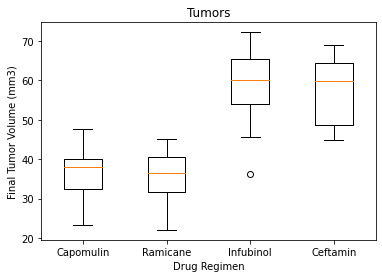

In [84]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

box_plot_data = [tumors_capo, tumors_rami, tumors_infu, tumors_ceft]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumors')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(box_plot_data, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])

plt.savefig('boxplot')
plt.show()

## Line and Scatter Plots

In [99]:
lineplot_df = capo_df.loc[capo_df["Mouse ID"] == "b128",:]
lineplot_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
304,b128,Capomulin,Female,9,22,20,42.731552,0


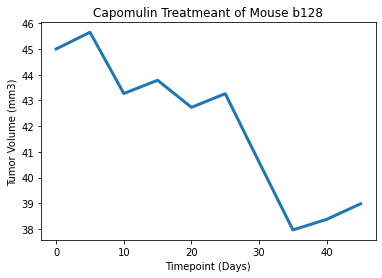

In [100]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

lineplot_df = capo_df.loc[capo_df["Mouse ID"] == "b128",:]

x_axis_lineplot = lineplot_df["Timepoint"]
tumor_size = lineplot_df["Tumor Volume (mm3)"]

plt.title('Capomulin Treatmeant of Mouse b128')
plt.plot(x_axis_lineplot, tumor_size,linewidth=3, markersize=10)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('linechart')
plt.show()

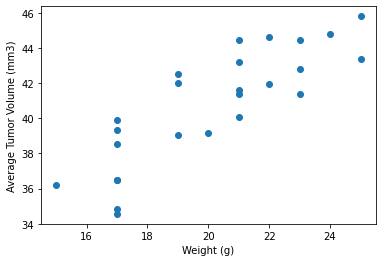

In [101]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capo_mean = capo_df.groupby(['Mouse ID']).mean()
plt.scatter(capo_mean['Weight (g)'],capo_mean['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.savefig('scatterplot')
plt.show()


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

In [114]:
coefficient = round(st.pearsonr(capo_mean['Weight (g)'],capo_mean['Tumor Volume (mm3)'])[0],2)

print(f"The correlation between mouse weight and average tumor volume is {coefficient}")

The correlation between mouse weight and average tumor volume is 0.84


In [115]:
linear_model=st.linregress(capo_mean['Weight (g)'],capo_mean['Tumor Volume (mm3)'])
linear_model

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)

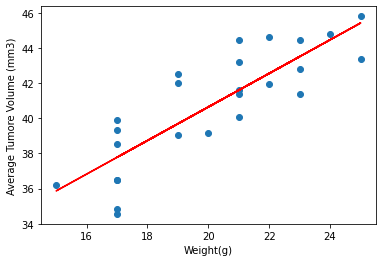

In [117]:
slope = 0.9544396890241045
intercept = 21.552160532685015

y_values = capo_mean['Weight (g)']*slope+intercept
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')

plt.scatter(capo_mean['Weight (g)'],capo_mean['Tumor Volume (mm3)'])
plt.plot(capo_mean['Weight (g)'],y_values,color="red")

plt.savefig('linearregression')
plt.show()